# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-11-06 00:02:03--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-11-06 00:02:03--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [2]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [3]:
data = pd.read_csv('Gender_bias_spanish.csv')

In [4]:
data

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased
...,...,...
1909,"iba a ir a dash pero mis 3 cortadas, mi color ...",non-biased
1910,que pinche chiste tiene estar medio alto si to...,non-biased
1911,si fuera bien idiota. ya hubiera comprado un a...,non-biased
1912,nota mental: no le quieras ayudar a alguien qu...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [9]:
# Resumen del conjunto de datos

# Contar la cantidad de tweets por etiqueta
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1914 non-null   object
 1   Label     1914 non-null   object
dtypes: object(2)
memory usage: 30.0+ KB


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

In [12]:
# Calcular la proporción de tweets por etiqueta
label_proportions = data['Label'].value_counts(normalize=True)
# Multiplicar por 100 y formatear a 2 decimales
label_proportions_percentage = (label_proportions * 100).round(2)
display(label_proportions_percentage)

,proportion
Label,
non-biased,83.39
biased,16.61


## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [16]:
# Cree una funcion limpiar texto
def clean_text(text):
    # Eliminar menciones de usuarios (@usuario)
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    # Eliminar URLs
    text = re.sub(r'https?://\S+', '', text)
    # Eliminar caracteres especiales y números
    text = re.sub(r'[^A-Za-zñÑáéíóúÁÉÍÓÚüÜ\s]', '', text)
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [14]:
# Aplicar la limpieza de texto
data['Clean_Contents'] = data['Contents'].apply(clean_text)
display(data[['Contents', 'Clean_Contents']].head())

,Contents,Clean_Contents
0,@chumeltorres ya cabrón! sin tí se reciben las...,cabrón tí reciben noticias colchoncito puro ch...
1,¿alguien es tan amable de ir a hacerme la comp...,alguien tan amable ir hacerme compra mañana ba...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",hahaha si rico nadamas falta presentación
3,@evagelcot donde lo ves!!? es mi programa favo...,ves programa favorito sólo encuentro temporada...
4,como siempre mi tortilla triunfa mas que otros...,siempre tortilla triunfa mas platos playa


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

In [17]:
# Separar tweets por etiqueta
biased_tweets = data[data['Label'] == 'biased']['Clean_Contents']
non_biased_tweets = data[data['Label'] == 'non-biased']['Clean_Contents']

# Unir todos los tweets limpiados por etiqueta
biased_text = " ".join(tweet for tweet in biased_tweets)
non_biased_text = " ".join(tweet for tweet in non_biased_tweets)

# Contar palabras
biased_word_counts = Counter(biased_text.split())
non_biased_word_counts = Counter(non_biased_text.split())

# Visualización de frecuencia de palabras
print("Palabras más comunes en tweets 'biased':")
display(biased_word_counts.most_common(20))

print("\nPalabras más comunes en tweets 'non-biased':")
display(non_biased_word_counts.most_common(20))

Palabras más comunes en tweets 'biased':


[('si', 30),
 ('mujer', 23),
 ('mujeres', 19),
 ('ser', 17),
 ('así', 16),
 ('quiero', 14),
 ('q', 14),
 ('mejor', 13),
 ('mamá', 12),
 ('tan', 12),
 ('solo', 12),
 ('cosas', 10),
 ('niñas', 10),
 ('casa', 10),
 ('sé', 9),
 ('chicas', 9),
 ('hombres', 9),
 ('puta', 8),
 ('ahora', 8),
 ('mal', 8)]


Palabras más comunes en tweets 'non-biased':


[('si', 167),
 ('gracias', 90),
 ('bien', 69),
 ('año', 65),
 ('quiero', 62),
 ('hoy', 62),
 ('día', 62),
 ('mejor', 62),
 ('tan', 59),
 ('días', 58),
 ('así', 58),
 ('ser', 55),
 ('ver', 55),
 ('vida', 52),
 ('pues', 52),
 ('feliz', 50),
 ('ahora', 47),
 ('mal', 46),
 ('hacer', 46),
 ('solo', 43)]

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

1.
En los tweets etiquetados como “biased” (sesgados) predominan palabras relacionadas con el género, los estereotipos y juicios personales. Se observan términos como “mujer”, “mujeres”, “niñas”, “chicas”, “mamá”, “hombres” y “puta”. Estas palabras reflejan un enfoque en la identidad y los roles sociales, así como una carga valorativa hacia determinados grupos.

Por el contrario, los tweets “non-biased” (no sesgados) contienen palabras más neutras o emocionales, asociadas a experiencias cotidianas y sentimientos generales. Entre las más frecuentes se encuentran “gracias”, “bien”, “año”, “día”, “feliz”, “vida” y “hacer”. Esto sugiere que los mensajes no sesgados tienden a centrarse en situaciones comunes, estados de ánimo o reflexiones personales, sin emitir juicios sobre grupos específicos.

2.

Sí. En los tweets sesgados aparecen palabras que reflejan explícitamente prejuicios o sesgos de género. Términos como “mujer”, “mujeres”, “niñas”, “chicas”, “mamá” y “hombres” muestran un enfoque reiterado en la diferencia entre géneros o en los roles asignados socialmente. Además, la palabra “puta” tiene una connotación despectiva y discriminatoria, lo que refuerza la idea de lenguaje cargado de juicios morales o sociales. También el uso de “casa” puede vincularse con estereotipos tradicionales asociados a las mujeres y las tareas del hogar.

3.

Las empresas pueden utilizar este tipo de análisis para identificar y comprender patrones de sesgo en los discursos digitales. En primer lugar, permite detectar el uso de lenguaje discriminatorio en redes sociales, foros o comentarios, facilitando la intervención oportuna ante contenidos que puedan afectar la reputación de la marca. En segundo lugar, esta información puede servir para diseñar estrategias de comunicación más inclusivas, evitando reproducir estereotipos o prejuicios en mensajes publicitarios.

Asimismo, el análisis lingüístico de sesgo puede aplicarse en el entrenamiento de modelos de inteligencia artificial y herramientas de moderación de contenido, de modo que reconozcan expresiones discriminatorias y promuevan una comunicación respetuosa.

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

In [19]:
## Cree una funcion para geenrar nube de palabras

Nube de palabras para tweets 'biased':


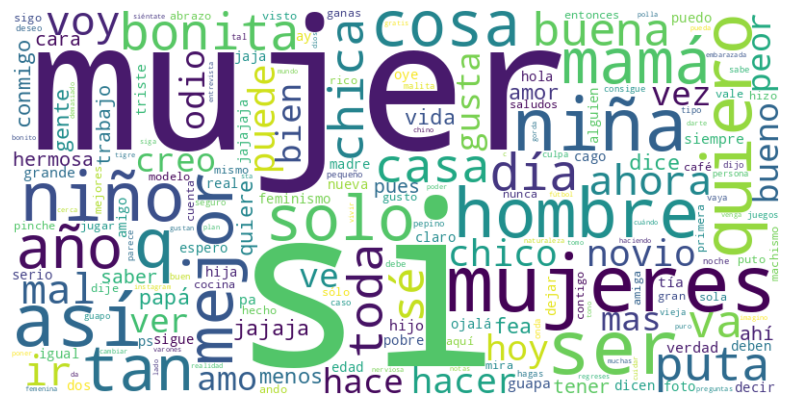


Nube de palabras para tweets 'non-biased':


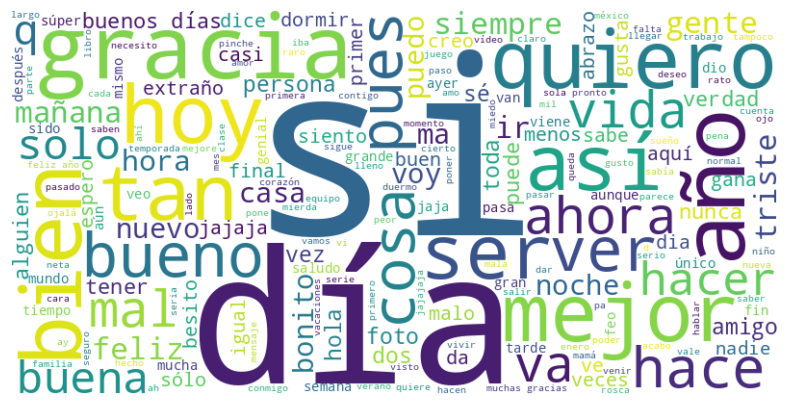

In [21]:
def generar_nube_palabras(texto):
    palabras = ' '.join(texto.split()) # The text is already cleaned
    nube = WordCloud(width=800, height=400, background_color='white').generate(palabras)
    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generar nube de palabras para cada conjunto
print("Nube de palabras para tweets 'biased':")
generar_nube_palabras(biased_text)

print("\nNube de palabras para tweets 'non-biased':")
generar_nube_palabras(non_biased_text)

In [ ]:
# NO biased nube de palabras


## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

1. Las marcas pueden aprovechar este tipo de análisis para ajustar su lenguaje y tono comunicativo, asegurándose de que sus mensajes sean inclusivos, empáticos y libres de sesgos. Identificar palabras con carga negativa o discriminatoria permite diseñar estrategias de comunicación más responsables, alineadas con valores de respeto y diversidad. Además, el monitoreo constante del lenguaje empleado por los usuarios ayuda a detectar cambios en la percepción de la marca, facilitando respuestas más rápidas y coherentes ante posibles crisis reputacionales.

2. Si el análisis revela que los tweets son mayoritariamente sesgados, la empresa podría reorientar su estrategia de marketing hacia mensajes que promuevan la equidad, la inclusión y la empatía. Se podrían implementar campañas educativas o de concientización que contrarresten los estereotipos detectados, utilizando un lenguaje positivo y diverso. Además, sería importante revisar los canales de comunicación y los voceros de la marca para garantizar coherencia entre el mensaje institucional y las prácticas comunicativas reales.

3. Un análisis futuro podría centrarse en la evolución del sesgo a lo largo del tiempo, identificando si las actitudes en redes sociales tienden a volverse más inclusivas o si persisten ciertos estereotipos. También sería útil explorar la relación entre eventos sociales, culturales o políticos y los picos de lenguaje sesgado. Otro enfoque valioso sería la segmentación por regiones o demografías, para entender cómo varían los discursos según el contexto. Finalmente, se podrían aplicar modelos de análisis de sentimiento y detección de emociones para obtener una visión más profunda del impacto emocional detrás de las conversaciones digitales.